In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_excel('DATA_SCIENCE_FILE2.xlsx')
df.head(5)

,TIMESTAMP,AGE,GENDER,COUNTRY,FAMILY_HISTORY,TREATMENT,WORK_INTERFERE,BENEFIT,SEEK_HELP,MENTAL_HEALTH_AFFECT,PHYSICAL_HEALTH_AFFECT
0,2014-08-29 17:26:15,18,Male,United States,No,No,Never,No,No,No,Maybe
1,2014-08-27 11:43:10,18,Male,Netherlands,No,No,Often,No,No,No,No
2,2014-08-27 12:15:11,18,Male,Russia,No,No,Yes,Yes,No,Yes,Yes
3,2014-08-27 12:31:43,18,Male,United States,No,Yes,Rarely,No,No,No,No
4,2014-08-27 14:10:15,18,Male,United States,No,Yes,Never,Don't know,Don't know,No,Maybe


In [4]:
df

,TIMESTAMP,AGE,GENDER,COUNTRY,FAMILY_HISTORY,TREATMENT,WORK_INTERFERE,BENEFIT,SEEK_HELP,MENTAL_HEALTH_AFFECT,PHYSICAL_HEALTH_AFFECT
0,2014-08-29 17:26:15,18,Male,United States,No,No,Never,No,No,No,Maybe
1,2014-08-27 11:43:10,18,Male,Netherlands,No,No,Often,No,No,No,No
2,2014-08-27 12:15:11,18,Male,Russia,No,No,Yes,Yes,No,Yes,Yes
3,2014-08-27 12:31:43,18,Male,United States,No,Yes,Rarely,No,No,No,No
4,2014-08-27 14:10:15,18,Male,United States,No,Yes,Never,Don't know,Don't know,No,Maybe
...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-02-24 10:32:32,60,Male,United States,No,Yes,Often,Don't know,Don't know,No,Maybe
1255,2014-08-29 01:20:32,61,Male,South Africa,No,Yes,Never,No,No,No,Maybe
1256,2014-08-27 17:12:01,62,Male,United States,No,No,Never,Yes,Yes,Maybe,Maybe
1257,2014-08-27 19:17:07,65,Male,United States,No,No,Yes,No,No,No,No


In [5]:
df.isnull().sum()

TIMESTAMP                 0
AGE                       0
GENDER                    0
COUNTRY                   0
FAMILY_HISTORY            0
TREATMENT                 0
WORK_INTERFERE            0
BENEFIT                   0
SEEK_HELP                 0
MENTAL_HEALTH_AFFECT      0
PHYSICAL_HEALTH_AFFECT    0
dtype: int64

In [6]:
age = df.groupby(['AGE'])['AGE'].count()
age

AGE
18     9
19    11
20     6
21    16
22    21
23    52
24    46
25    61
26    76
27    71
28    68
29    87
30    63
31    67
32    82
33    70
34    65
35    55
36    37
37    43
38    39
39    33
40    33
41    21
42    20
43    28
44    11
45    12
46    12
47     2
48     6
49     4
50     6
51     5
53     1
54     3
55     3
56     4
57     3
58     1
60     2
61     1
62     1
65     1
72     1
Name: AGE, dtype: int64

<Axes: title={'center': 'Age value count'}, xlabel='AGE'>

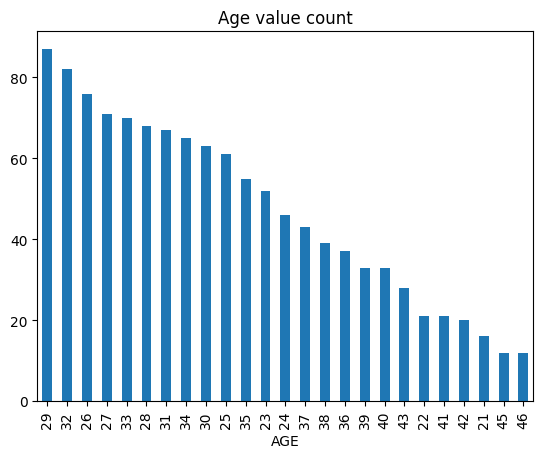

In [33]:
(df.AGE).value_counts().head(25).plot(kind='bar',title='Age value count')

In [8]:
fh=df.groupby(['FAMILY_HISTORY'])['FAMILY_HISTORY'].count()
fh

FAMILY_HISTORY
No     767
Yes    492
Name: FAMILY_HISTORY, dtype: int64

In [9]:
fig= px.pie(fh,fh.index, fh.values,title ='Family History')
fig.show()

In [10]:
c1=df.loc[df['FAMILY_HISTORY'] =='Yes'].groupby(['FAMILY_HISTORY','COUNTRY'])['AGE'].count()
c1

FAMILY_HISTORY  COUNTRY               
Yes             Australia                  11
                Austria                     1
                Bahamas, The                1
                Belgium                     1
                Bosnia and Herzegovina      1
                Brazil                      2
                Canada                     27
                Croatia                     1
                Czech Republic              1
                Denmark                     2
                France                      2
                Germany                    14
                Hungary                     1
                India                       1
                Ireland                     9
                Israel                      1
                Italy                       2
                Japan                       1
                Mexico                      1
                Netherlands                 8
                New Zealand              

<Axes: title={'center': 'Family history =>Yes'}, xlabel='FAMILY_HISTORY,COUNTRY'>

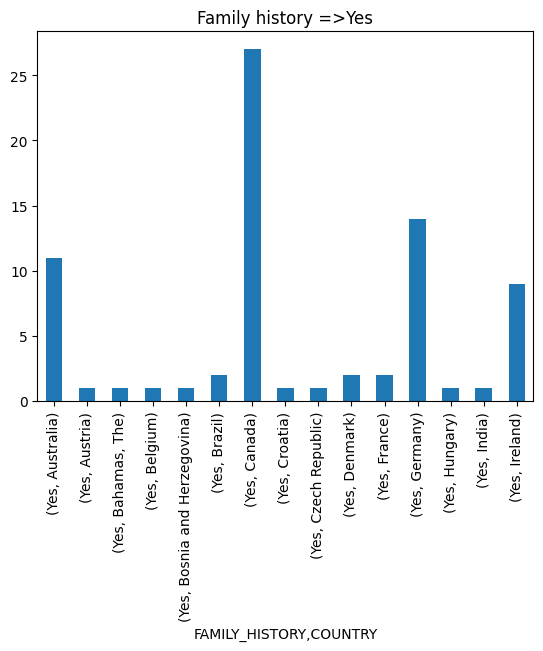

In [11]:
c1.head(15).plot(kind='bar',title='Family history =>Yes')

In [12]:
gd=df.groupby(['GENDER'])['GENDER'].count()
gd

GENDER
Female    265
Male      994
Name: GENDER, dtype: int64

In [13]:
fig= px.pie(gd,gd.index, gd.values,title ='Gender')
fig.show()

In [14]:
gd=df.groupby(['GENDER'])['GENDER'].count()
gd

GENDER
Female    265
Male      994
Name: GENDER, dtype: int64

# 1st Graph

In [15]:
top_20_countries = df["COUNTRY"].value_counts().nlargest(10).index.tolist()
data_filtered = df[df["COUNTRY"].isin(top_20_countries)]

# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["COUNTRY", "FAMILY_HISTORY"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="COUNTRY",
    y="Count",
    color="FAMILY_HISTORY",
    barmode="group",
    title="Family History Distribution by Country",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="COUNTRY",
    yaxis_title="Number of Respondents",
    legend_title="FAMILY_HISTORY",
)

# Display the graph
fig.show()

In [16]:
age=df.loc[df['AGE']<=30].groupby(['FAMILY_HISTORY'])['AGE'].count()
age

FAMILY_HISTORY
No     369
Yes    218
Name: AGE, dtype: int64

In [17]:
fig= px.pie(age,age.index, age.values, title ='Family History for Age<=30')
fig.show()

In [18]:
age1=df.loc[df['AGE'] >30].groupby(['FAMILY_HISTORY'])['AGE'].count()
age1

FAMILY_HISTORY
No     398
Yes    274
Name: AGE, dtype: int64

In [19]:
fig= px.pie(age1,age1.index, age1.values, title ='Family History for Age>30')
fig.show()

# 2 Graph

In [20]:
# Create separate histograms for each combination of Physical health and Mental health
for phy_health in ["Yes", "No"]:
    for men_health in ["Yes", "No"]:
        filtered_df = df[(df["PHYSICAL_HEALTH_AFFECT"] == phy_health) & (df["MENTAL_HEALTH_AFFECT"] == men_health)]
        fig = px.histogram(filtered_df, x="AGE", title=f"Age Distribution for Physical Health: {phy_health}, Mental Health: {men_health}")
        fig.show()

In [21]:
phy = df.groupby(['AGE'])['PHYSICAL_HEALTH_AFFECT'].count()
phy

AGE
18     9
19    11
20     6
21    16
22    21
23    52
24    46
25    61
26    76
27    71
28    68
29    87
30    63
31    67
32    82
33    70
34    65
35    55
36    37
37    43
38    39
39    33
40    33
41    21
42    20
43    28
44    11
45    12
46    12
47     2
48     6
49     4
50     6
51     5
53     1
54     3
55     3
56     4
57     3
58     1
60     2
61     1
62     1
65     1
72     1
Name: PHYSICAL_HEALTH_AFFECT, dtype: int64

# 3rd Graph 

In [22]:
# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["GENDER", "TREATMENT"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

In [23]:
# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="GENDER",
    y="Count",
    color="TREATMENT",
    barmode="stack",
    title="Treatment based on Gender",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="GENDER",
    yaxis_title="Number of Respondents",
    legend_title="TREATMENT",
)

# Display the graph
fig.show()

In [24]:
# Create the bar graph using Plotly
fig = px.funnel(
    grouped_data,
    x="GENDER",
    y="Count",
    color="TREATMENT",
    # barmode="stack",
    title="Treatment based on Gender",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="GENDER",
    yaxis_title="Number of Respondents",
    legend_title="TREATMENT",
)

# Display the graph
fig.show()

# 4th Graph 

In [25]:
# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["COUNTRY", "TREATMENT"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="COUNTRY",
    y="Count",
    color="TREATMENT",
    barmode="stack",
    title="Country-wise graphs for Treatment",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="COUNTRY",
    yaxis_title="Number of Respondents",
    legend_title="TREATMENT",
)

# Display the graph
fig.show()

# 5th Graph 

In [26]:
# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["GENDER", "WORK_INTERFERE"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="GENDER",
    y="Count",
    color="WORK_INTERFERE",
    barmode="group",
    title="WORK INTERFERE WITH GENDER",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="GENDER",
    yaxis_title="Number of Respondents",
    legend_title="WORK_INTERFERE",
)

# Display the graph
fig.show()

In [27]:
grouped_data = (
    df.groupby(["GENDER", "FAMILY_HISTORY"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

In [28]:
# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="GENDER",
    y="Count",
    color="FAMILY_HISTORY",
    barmode="stack",
    title="FAMILY HISTORY w.r.t GENDER",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="GENDER",
    yaxis_title="Number of Respondents",
    legend_title="FAMILY_HISTORY",
)

# Display the graph
fig.show()

# Extra 

In [29]:
# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["COUNTRY", "BENEFIT"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="COUNTRY",
    y="Count",
    color="BENEFIT",
    barmode="stack",
    title="Country-wise graphs for Benefit",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="COUNTRY",
    yaxis_title="Number of Respondents",
    legend_title="Benefit",
)

# Display the graph
fig.show()

In [30]:
df

,TIMESTAMP,AGE,GENDER,COUNTRY,FAMILY_HISTORY,TREATMENT,WORK_INTERFERE,BENEFIT,SEEK_HELP,MENTAL_HEALTH_AFFECT,PHYSICAL_HEALTH_AFFECT
0,2014-08-29 17:26:15,18,Male,United States,No,No,Never,No,No,No,Maybe
1,2014-08-27 11:43:10,18,Male,Netherlands,No,No,Often,No,No,No,No
2,2014-08-27 12:15:11,18,Male,Russia,No,No,Yes,Yes,No,Yes,Yes
3,2014-08-27 12:31:43,18,Male,United States,No,Yes,Rarely,No,No,No,No
4,2014-08-27 14:10:15,18,Male,United States,No,Yes,Never,Don't know,Don't know,No,Maybe
...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-02-24 10:32:32,60,Male,United States,No,Yes,Often,Don't know,Don't know,No,Maybe
1255,2014-08-29 01:20:32,61,Male,South Africa,No,Yes,Never,No,No,No,Maybe
1256,2014-08-27 17:12:01,62,Male,United States,No,No,Never,Yes,Yes,Maybe,Maybe
1257,2014-08-27 19:17:07,65,Male,United States,No,No,Yes,No,No,No,No


In [31]:
# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["AGE", "BENEFIT"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="AGE",
    y="Count",
    color="BENEFIT",
    barmode="stack",
    title="Age-wise graphs for Benefit",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="AGE",
    yaxis_title="Number of Respondents",
    legend_title="Benefit",
)

# Display the graph
fig.show()

In [32]:
# Group data by country and family history response
grouped_data = (
    data_filtered.groupby(["AGE", "SEEK_HELP"])
    .size()
    .to_frame(name="Count")
    .reset_index()
)

# Create the bar graph using Plotly
fig = px.bar(
    grouped_data,
    x="AGE",
    y="Count",
    color="SEEK_HELP",
    barmode="group",
    title="Age-wise graphs for Seek-help",
)

# Customize the graph (optional)
fig.update_layout(
    xaxis_title="AGE",
    yaxis_title="Number of Respondents",
    legend_title="Seek-help",
)

# Display the graph
fig.show()